In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv",nrows=4000)
fn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake.csv",nrows=4000)

In [4]:
fn.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
tn['class'] = 1
fn['class'] = 0
tn.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
df = pd.concat([tn.head(4000),fn.head(4000)], ignore_index = True)
df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
7995,Robert Reich’s Conversation With A Fmr. GOP R...,Robert Reich is one of the most respected voic...,News,"October 31, 2016",0
7996,Ohio Democratic Headquarters Vandalized With ...,"This has been one nasty election year. First, ...",News,"October 31, 2016",0
7997,‘Christians’ Create Grisly Haunted House Clai...,Chicago doesn t tend to be one of the cities o...,News,"October 30, 2016",0
7998,Harry Reid TORCHES FBI Director Comey: ‘I Bel...,Senate Minority Leader Harry Reid (D-NV) wrote...,News,"October 30, 2016",0


In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,class
0,Reporters barred from Kushner Companies' event...,SHANGHAI (Reuters) - Organizers barred journal...,politicsNews,"May 7, 2017",1
1,Trump travel ban on more solid ground as top c...,NEW YORK (Reuters) - The Supreme Court signale...,politicsNews,"September 25, 2017",1
2,Trump Just Praised Republicans For Stripping ...,Senate Republicans voted to repeal the Afforda...,News,"January 12, 2017",0
3,Trump Whines That The Media Wouldn’t Film His...,Trump s desperation to convince people that th...,News,"September 22, 2017",0
4,"Internet firms shift stance, move to exile whi...",SAN FRANCISCO (Reuters) - Silicon Valley joine...,politicsNews,"August 16, 2017",1
...,...,...,...,...,...
7995,Trump Executive Order Mandates Two Regulation...,Donald Trump is literally ordering the governm...,News,"January 30, 2017",0
7996,Trump on Hurricane Irma: 'This is some big mon...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 10, 2017",1
7997,Spicer: It Would Be ‘Misguided And Wrong’ To ...,There was a time when a brutal dictator would ...,News,"January 30, 2017",0
7998,"California Rep Gets The Ball Rolling, Files F...",California Democratic Representative Brad Sher...,News,"July 13, 2017",0


In [8]:
df['News'] = df['title'] + " " + df['text'] + " " + df['subject']
df

,title,text,subject,date,class,News
0,Reporters barred from Kushner Companies' event...,SHANGHAI (Reuters) - Organizers barred journal...,politicsNews,"May 7, 2017",1,Reporters barred from Kushner Companies' event...
1,Trump travel ban on more solid ground as top c...,NEW YORK (Reuters) - The Supreme Court signale...,politicsNews,"September 25, 2017",1,Trump travel ban on more solid ground as top c...
2,Trump Just Praised Republicans For Stripping ...,Senate Republicans voted to repeal the Afforda...,News,"January 12, 2017",0,Trump Just Praised Republicans For Stripping ...
3,Trump Whines That The Media Wouldn’t Film His...,Trump s desperation to convince people that th...,News,"September 22, 2017",0,Trump Whines That The Media Wouldn’t Film His...
4,"Internet firms shift stance, move to exile whi...",SAN FRANCISCO (Reuters) - Silicon Valley joine...,politicsNews,"August 16, 2017",1,"Internet firms shift stance, move to exile whi..."
...,...,...,...,...,...,...
7995,Trump Executive Order Mandates Two Regulation...,Donald Trump is literally ordering the governm...,News,"January 30, 2017",0,Trump Executive Order Mandates Two Regulation...
7996,Trump on Hurricane Irma: 'This is some big mon...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 10, 2017",1,Trump on Hurricane Irma: 'This is some big mon...
7997,Spicer: It Would Be ‘Misguided And Wrong’ To ...,There was a time when a brutal dictator would ...,News,"January 30, 2017",0,Spicer: It Would Be ‘Misguided And Wrong’ To ...
7998,"California Rep Gets The Ball Rolling, Files F...",California Democratic Representative Brad Sher...,News,"July 13, 2017",0,"California Rep Gets The Ball Rolling, Files F..."


In [9]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [10]:
TL = WordNetLemmatizer()
corpus = []

In [11]:
for i in range (0,8000):
    line = re.sub('[^a-zA-Z]', " ", df['News'][i])
    line = line.lower()
    line = line.split()
    line = [TL.lemmatize(word) for word in line if not word in set(stopwords.words('english'))]
    line = " ".join(line)
    corpus.append(line)
    

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [13]:
y = df['class'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [15]:
from sklearn.naive_bayes import GaussianNB 
model=GaussianNB()
final=model.fit(X_train,y_train)

print("Testing score",final.score(X_test,y_test))

Testing score 0.94


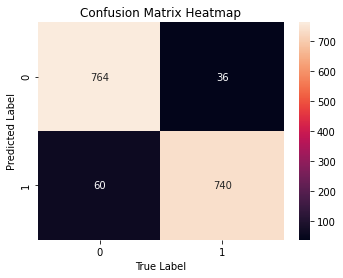

In [16]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

svm_predicted=final.predict(X_test)
svm_confuse=confusion_matrix(y_test,svm_predicted)
df_cm=pd.DataFrame(svm_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [17]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,svm_predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       800
           1       0.95      0.93      0.94       800

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

